<a href="https://colab.research.google.com/github/voknerog/data_analyse/blob/main/bella_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *
import seaborn as sns

%matplotlib inline


# Case Study for Bellabeat

* Data Analyst: Alex Gorenkov
* Date: 2022-10-03

---









# Introduction

**Bellabeat** is a high-tech manufacturer of health-focused products for women.
Company goals:
* Developing beautifully designed technology that informs and inspires women around the world
* Empowering women with knowledge about their own health and habits
* Further development and growth in the number of product users


The analysis was performed according to the data analysis process steps:
**ask**, **prepare**, **process**, **analyze**, **share**, and **act**.


## **1. ASK**

### Business task:
* Analyze smart device data to gain insight into how consumers are using their smart devices. Present trends and high-level recommendations for Bellabeat’s marketing strategy team.


### Questions for analyse:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

### Key stakeholders
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**

## **2. PREPARE**

### Data sets
[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit):<br>
*LICENSE(CC0: Public Domain)*

* Public data that were generated by respondents to a distributed survey via Amazon Mechanical Turk between **03.12.2016-05.12.2016**
* Contains information about **30** **eligible** Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring
* Conist of 18 long format csv files


### Data credibility
* Second party source
* Small sample size (30 respondents)
* Old data (2016)
* May contain bias data
* Not original (Amazon Mechanical Turk survey)
* Not cited 

Existing data isn't good for analyze and I'd recomend to make fresher and wider survey for more accurate analyze.
But for studying course this data fits.

### Data organization
<table >
<tr><th > File name <th><th>Description <th><th> Number of users <tr><tr>
<tr><td> dailyActivity_merged <td><td> Contains daily information for automatically detected and manually entered activities <td><td> 33 <td><tr>
<tr><td> dailyCalories_merged <td><td> Estimated daily energy expenditure <td><td> 33 <td><tr>
<tr><td> dailyIntensities_merged <td><td> Daily time spent in one of four intensity categories <td><td> 33 <td><tr>
<tr><td> dailySteps_merged <td><td> Daily steps <td><td> 33 <td><tr>
<tr><td> heartrate_seconds_merged <td><td> Heart rate values recorded by the Fitbit device every 5 seconds<td><td> 14 <td><tr>
<tr><td> hourlyCalories_merged <td><td> Hourly calories burned <td><td> 33 <td><tr>
<tr><td> hourlyIntensities_merged <td><td> Hourly total and average intensity <td><td> 33 <td><tr>
<tr><td> hourlySteps_merged	 <td><td> Hourly steps <td><td> 33 <td><tr>
<tr><td> minuteCaloriesNarrow_merged <td><td> Calories burned by the minute (narrow form)	 <td><td> 33 <td><tr>
<tr><td> minuteCaloriesWide_merged <td><td> Intensity counted by the minute (wide form) <td><td> 33 <td><tr>
<tr><td> minuteIntensitiesNarrow_merged <td><td> Intensity counted by the minute (narrow form) <td><td> 33 <td><tr>
<tr><td> minuteIntensitiesWide_merged <td><td> Intensity counted by the minute (wide form) <td><td> 33 <td><tr>
<tr><td> minuteMETsNarrow_merged <td><td> Metabolic equivalent of task <td><td> 33 <td><tr>
<tr><td> minuteSleep_merged <td><td> Sleep by the minute	 <td><td> 24 <td><tr>
<tr><td> minuteStepsNarrow_merged <td><td> Steps tracked by the minute (narrow form) <td><td> 33 <td><tr>
<tr><td> minuteStepsWide_merged <td><td> Steps tracked by the minute (wide form) <td><td> 33 <td><tr>
<tr><td> sleepDay_merged <td><td> Data from each tracked sleep event <td><td> 21 <td><tr>
<tr><td> weightLogInfo_merged <td><td> Contains data values pertaining to each tracked weight measurement <td><td> 8 <td><tr>
<table>

### Data selection
* dailyActivity_merged.csv
* hourlyCalories_merged.csv
* hourlyIntensities_merged.csv
* hourlySteps_merged.csv
* sleepDay_merged.csv
* weightLogInfo_merged.csv

### [Data dictionary](https://www.fitabase.com/media/1546/fitabasedatadictionary.pdf)





## **Process**

### Data tools
* Google spreadsheet (removing duplicates, trim spaces, separating columns)
* BigQuery (join data, selecting distinct values)
* Python libraries (data manipulating, visualizing)

### Basic datasets cleaning
For *daily*, *hourly*, *weight* and *sleep* data were used **remove duplicates** and **trim whitespace** functions in google spreadsheet.
Totaly 3 rows were removed.
In *sleepDay_merged.csv*, *hourlyIntensities*, *hourlySteps* format of dates was changed and date and time were separeted.


### Datasets merging

Using BigQuery for merge three tables with hourly data. And export to hourlyActivity_merged.csv file

```
SELECT DISTINCT intens.Id, steps.Date, steps.Time,TotalIntensity, AverageIntensity, Calories, StepTotal
FROM `steam-style-360112.bellabeat.hourly_intestities` intens
LEFT JOIN `steam-style-360112.bellabeat.hourly_calories` calor
ON intens.Id = calor.Id AND
intens.Day = calor.Activity_Date
LEFT JOIN `steam-style-360112.bellabeat.hourly_steps` steps
ON intens.Id = steps.Id AND
intens.Day = steps.Date;
```

### Data integrity

Using *describe* method in python to check data.
There are any too inaccurate data was not found.



## **Analyze**

There is no conclusive evidence that natal sex affects the number of steps that a person should take. Therefore, 10,000 steps per day is a suitable goal for males and females.

## CDC steps categories for adults:
* Sedentary (less than **5,000** steps per day)
* Light active (**5,000** - **7,500**  steps per day)
* Active (**10,000** - **12,500** steps per day)
* Very active (more than **12,500** steps per day)

### Recommended hours of sleep per day for adult (18 - 60 years) is more that **7 hours** 

*Source: National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health*

### BMI - Adult Body Mass Index

* If your BMI is less than 18.5, it falls within the underweight range.
* If your BMI is 18.5 to <25, it falls within the healthy weight range.
* If your BMI is 25.0 to <30, it falls within the overweight range.
* If your BMI is 30.0 or higher, it falls within the obesity range.

**Content source: Division of Nutrition, Physical Activity, and Obesity, National Center for Chronic Disease Prevention and Health Promotion*





## Researching activity by weekday

Activity difference in the most and least active days = 32.0 


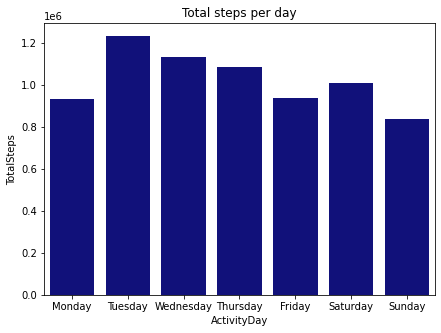

In [ ]:
# Reading daily activity file

daily_activity = pd.read_csv('/content/dailyActivity_merged.csv')

# Changing type of `Id` column

daily_activity.Id = daily_activity.Id.astype(str)

# Making dataset of weekdays and total steps

activity_by_weekday = daily_activity \
.groupby('ActivityDay', as_index=False) \
.agg({'TotalSteps':'sum'})

# Sorting weekday in right order

activity_by_weekday['DayNumber'] = pd.Series([5, 1, 6, 7, 4, 2, 3])
activity_by_weekday.DayNumber.astype(int)
activity_by_weekday = activity_by_weekday.sort_values('DayNumber')

# Plotting 'Total steps per day' graph

plt.figure(figsize=(7,5))
weekday_activity = sns.barplot(data=activity_by_weekday, x='ActivityDay', y='TotalSteps', color='darkblue') \
.set(title='Total steps per day')
weekday_activity
min_activity = activity_by_weekday[activity_by_weekday['TotalSteps'] == activity_by_weekday['TotalSteps'].min()].TotalSteps
max_activity = activity_by_weekday[activity_by_weekday['TotalSteps'] == activity_by_weekday['TotalSteps'].max()].TotalSteps
activity_dif_percents = np.round((max_activity[5] - min_activity[3]) / max_activity[5] * 100)
print(f'Activity difference in the most and least active days = {activity_dif_percents} ')

## Researching splitting by intensity per day

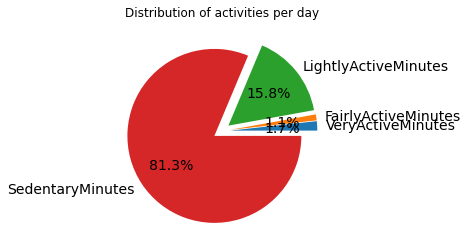

In [ ]:
activity_groups = ['VeryActiveMinutes',	'FairlyActiveMinutes',	'LightlyActiveMinutes',	'SedentaryMinutes']
active_minutes = daily_activity[['VeryActiveMinutes',	'FairlyActiveMinutes',	'LightlyActiveMinutes',	'SedentaryMinutes']]
active_minutes.sum().plot(kind= 'pie',ylabel='', 
                          autopct='%1.1f%%', fontsize='14', explode=(0.1, 0.1,0.1, 0.1),
                          title='Distribution of activities per day')
plt.show()

In [ ]:
total_day_minutes = 24 * 60
sedentary_minutes = 0.813 * total_day_minutes
lightly_minutes = 0.158 * total_day_minutes
fairly_minutes = 0.01 * total_day_minutes
minutes_very_activ= 0.017 * total_day_minutes
active_faitly_very_active = minutes_very_activ + fairly_minutes
[sedentary_minutes, lightly_minutes, active_faitly_very_active]

[1170.72, 227.52, 38.88]

## Researching dependence burn calories from made steps


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,4/12/2016,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,4/13/2016,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,4/14/2016,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,4/15/2016,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,4/16/2016,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


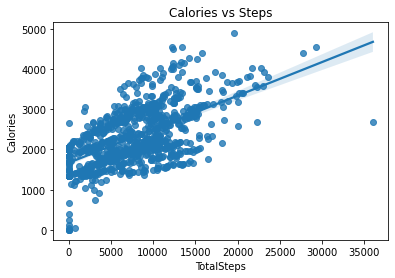

In [ ]:
# Total Steps vs Calories scatterplot

sns.regplot('TotalSteps', 'Calories', data=daily_activity) \
.set(title='Calories vs Steps')
daily_activity.head()

In [ ]:
daily_activity.head()

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,4/12/2016,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,4/13/2016,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,4/14/2016,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,4/15/2016,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,4/16/2016,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


## Statistical data about daily activity

In [ ]:
daily_activity.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


## Analyzing part of users who made recommended quantity of steps per day

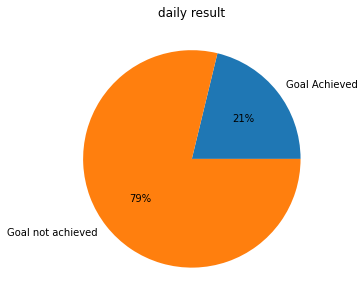

,Id,TotalSteps,GoalAchieved
32,8877689391,16040.032258,True
27,8053475328,14763.290323,True
0,1503960366,12116.741935,True
5,2022484408,11370.645161,True
25,7007744171,11323.423077,True


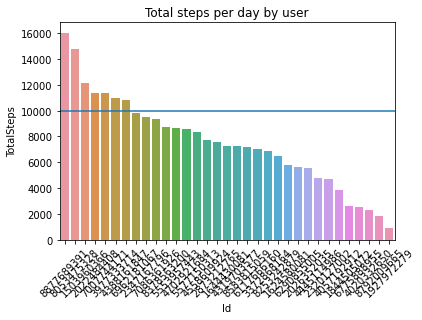

In [ ]:
# Changing chart size
plt.figure(figsize=(10,5))
# Making daily average steps dataset
mean_steps = daily_activity \
.groupby('Id', as_index=False) \
.agg({'TotalSteps':'mean'}) \
.sort_values('TotalSteps', ascending=False)
# CDC steps recommendation
steps_goal = 10000
# Adding column with total daily steps achievment result
mean_steps['GoalAchieved'] = True
mean_steps.loc[mean_steps['TotalSteps'] < 10000 ,'GoalAchieved'] = False
# Counting achieved and not achieved 10000 steps amount of users
GoalAchieved = 0
GoalNotAchieved = 0
for i in mean_steps['GoalAchieved']:
  if i == True:
    GoalAchieved += 1
  else:
    GoalNotAchieved +=1
# Plotting and displaying daily result pie chart
goals_result_count = [GoalAchieved, GoalNotAchieved]
goals_result = ['Goal Achieved', 'Goal not achieved']
daily_steps_result = plt.pie(goals_result_count, labels=goals_result, autopct='%.0f%%')
plt.title('daily result')
plt.show()
# Plotting total mean steps by id bar chart
daily_steps_goal_by_id = sns.barplot(x='Id', y='TotalSteps', data=mean_steps) \
.set(title='Total steps per day by user')
plt.axhline(y=10000)
plt.xticks(rotation=45)
daily_steps_goal_by_id
mean_steps.head()


## Looking for weight changing between activ and sedentary users weighting

In [ ]:
# weight[weight['Date'] == weight['Date'].min()].WeightKg
weight_veryactiv_id_min = weight[(weight['Id'] == 8877689391) & (weight['Date'] == weight[weight['Id'] == 8877689391].min().Date)].WeightKg
weight_veryactiv_id_max = weight[(weight['Id'] == 8877689391) & (weight['Date'] == weight[weight['Id'] == 8877689391].max().Date)].WeightKg
# weight[weight['Id'] == 8877689391].min().Date
weight_sedentary_id_min = weight[(weight['Id'] == 4558609924) & (weight['Date'] == weight[weight['Id'] == 4558609924].min().Date)].WeightKg
weight_sedentary_id_max = weight[(weight['Id'] == 4558609924) & (weight['Date'] == weight[weight['Id'] == 4558609924].max().Date)].WeightKg
[weight_sedentary_id_min[7], weight_sedentary_id_max[11]]
print(f'Sedentary user first weighted {weight_sedentary_id_min[7]}kg and end weighted {weight_sedentary_id_max[11]}kg')
print(f'Active user first weighted {weight_veryactiv_id_min[43]}kg and end weighted {weight_veryactiv_id_max[64]}kg')


Sedentary user first weighted 69.6999969482422kg and end weighted 69.0999984741211kg
Active user first weighted 85.8000030517578kg and end weighted 85.5kg


## Defining regular weight tool users

,Id,Days of using
6,6962181067,30
7,8877689391,24
4,4558609924,5
0,1503960366,2
2,2873212765,2
3,4319703577,2
1,1927972279,1
5,5577150313,1


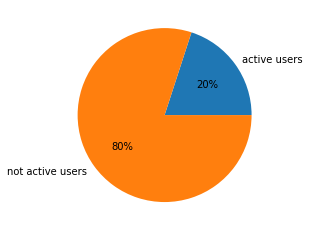

In [ ]:
# Reading weight data
weight = pd.read_csv('/content/weightLogInfo_merged.csv')

not_active_weight_users = weight.Id.nunique()
weight_users_quantity = weight \
.groupby('Id', as_index=False) \
.agg({'Date' : 'count'}) \
.sort_values('Date', ascending=False)
active_weight_users = weight_users_quantity[weight_users_quantity.Date > 20].count().Date  
percent_active_users = active_weight_users / not_active_weight_users * 100
percent_active_users
weight_activity = plt.pie([active_weight_users,not_active_weight_users], labels=['active users', 'not active users'], autopct='%.0f%%')
weight_users_quantity.rename(columns={'Date':'Days of using'})

## Sleep data analyze

### Frequency of using the sleep tracker tool

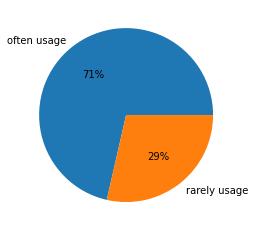

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,3.880000e+02,388.000000,388.000000,388.000000
mean,5.035934e+09,1.123711,437.103093,477.824742
std,2.073144e+09,0.352407,93.829025,100.062281
min,1.503960e+09,1.000000,213.000000,248.000000
25%,3.977334e+09,1.000000,379.750000,415.000000
50%,4.702922e+09,1.000000,439.000000,469.000000
75%,6.962181e+09,1.000000,496.250000,531.500000
max,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
# Reading sleep data
sleep_data = pd.read_csv('/content/sleepDay_merged.csv')
# Removing doubtful data
sleep_data = sleep_data[sleep_data['TotalMinutesAsleep'] > 180]
# Getting and plotting usage frequency data
day_used = sleep_data \
.groupby('Id', as_index=False) \
.agg({'Day':'count'}) \
.sort_values('Day', ascending=False)
often_use_sleepdata_device = day_used[day_used['Day'] >= 15].count().Id
rare_use_sleepdata_device = day_used[day_used['Day'] < 15].count().Id
using_sleepdata_device = plt.pie([often_use_sleepdata_device,rare_use_sleepdata_device], labels=['often usage', 'rarely usage'], autopct='%.0f%%')
plt.show()
sleep_data.describe()

### Sleep compliance *analysis*

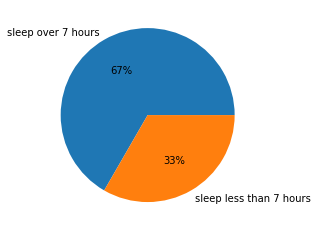

In [ ]:
# recommandation to sleep per dat
sleep_norm = 7 * 60
# Plotting sleep data pie chart
sleep_enough = sleep_data \
.groupby('Id', as_index=False) \
.agg({'TotalMinutesAsleep':'mean'}) \
.query('TotalMinutesAsleep >= 420') \
.agg({'Id':'count'}).Id
sleep_not_enough = sleep_data \
.groupby('Id', as_index=False) \
.agg({'TotalMinutesAsleep':'mean'}) \
.query('TotalMinutesAsleep < 420') \
.agg({'Id':'count'}).Id
sleep_not_enough
using_sleepdata_device = plt.pie([sleep_enough,sleep_not_enough], labels=['sleep over 7 hours', 'sleep less than 7 hours'], autopct='%.0f%%')
plt.show()

# Calculating what proportion of users belong to which BMI category

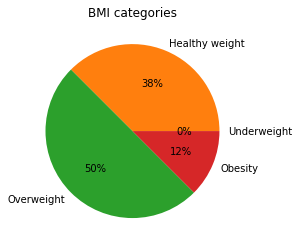

In [ ]:
# Adding BMI categories to each user
user_bmi = [(weight['BMI'] < 18.5), (weight['BMI'] >= 18.5) & (weight['BMI'] < 25),
(weight['BMI'] >= 25) & (weight['BMI'] < 30),(weight['BMI'] >= 30)]
bmi_categories = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']
weight['bmi_category'] = np.select(user_bmi, bmi_categories)
bmi_categorie_users =  weight \
.groupby(['Id', 'bmi_category'], as_index=False) \
.agg({'BMI':'count'})
# Counting quantity users for each category 
underweight = bmi_categorie_users[bmi_categorie_users['bmi_category'] == 'Underweight'].count().Id
healthy_weight = bmi_categorie_users[bmi_categorie_users['bmi_category'] == 'Healthy weight'].count().Id
overweight = bmi_categorie_users[bmi_categorie_users['bmi_category'] == 'Overweight'].count().Id
obesity = bmi_categorie_users[bmi_categorie_users['bmi_category'] == 'Obesity'].count().Id
# Plotting BMI categories pie chart
bmi_pie_chart = plt.pie([underweight, healthy_weight, overweight, obesity], labels=bmi_categories, autopct='%.0f%%')
plt.title('BMI categories')
plt.show()


# Work with hourly data

In [ ]:
hourly_data = pd.read_csv('/content/hourly_merged_data.csv')

In [ ]:
hourly_data.head()

,Id,Date,Time,TotalIntensity,AverageIntensity,Calories,StepTotal
0,4702921684,2016-04-25,03:00:00 PM,33,0.55,180,209
1,4702921684,2016-04-25,08:00:00 PM,33,0.55,180,691
2,4702921684,2016-04-25,09:00:00 PM,33,0.55,180,1395
3,4702921684,2016-04-25,02:00:00 AM,33,0.55,156,0
4,4702921684,2016-04-25,12:00:00 PM,33,0.55,156,149


In [ ]:
hourly_data.describe()

,Id,TotalIntensity,AverageIntensity,Calories,StepTotal
count,4.286641e+06,4.286641e+06,4.286641e+06,4.286641e+06,4.286641e+06
mean,4.904480e+09,2.176555e+01,3.627592e-01,1.169434e+02,3.921382e+02
std,2.357361e+09,2.615737e+01,4.359561e-01,7.360483e+01,7.455553e+02
min,1.503960e+09,0.000000e+00,0.000000e+00,4.200000e+01,0.000000e+00
25%,2.873213e+09,5.000000e+00,8.333300e-02,7.500000e+01,0.000000e+00
50%,4.558610e+09,1.400000e+01,2.333330e-01,9.800000e+01,1.260000e+02
75%,6.962181e+09,2.800000e+01,4.666670e-01,1.330000e+02,4.580000e+02
max,8.877689e+09,1.800000e+02,3.000000e+00,9.480000e+02,1.055400e+04


## Analyzing hourly steps activity

,Time,StepTotal
22,00:00:00,8513489
0,01:00:00,4968901
2,02:00:00,3445701
4,03:00:00,1321726
6,04:00:00,2995875


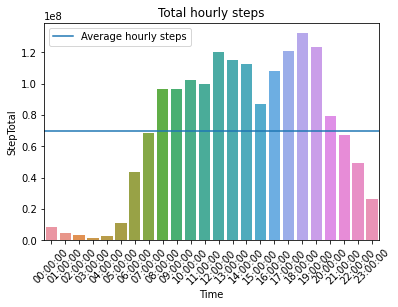

In [ ]:
# Calculating how many steps users spend in each hour
hours_steps = hourly_data \
.groupby('Time', as_index=False) \
.agg({'StepTotal':'sum'})
hours_steps['Time'] = pd.to_datetime(hours_steps['Time']).dt.strftime('%H:%M:%S')
# Sorting by hours
hours_steps = hours_steps.sort_values('Time')
hours_steps_bars = sns.barplot(data=hours_steps, x='Time', y='StepTotal')
plt.xticks(rotation=45)
hours_steps_bars.set(title='Total hourly steps')
plt.axhline(y=hours_steps.StepTotal.mean(), label = "Average hourly steps")
plt.legend(fontsize='10')
hours_steps.head()

## **Share**

After analyzing the data obtained, I would like to say that the data is outdated, does not fully correspond to the exact analysis for making data driven decisions, and the sample is small. It would be useful for **Bellabeat** to collect its data from the original source, their analysis would be as accurate and relevant as possible.

### **Key findings from my analyze**


* **Thueday** is the *most* active weekday, **Sunday** - *least* active
* On each average user there are **1170** minutes *sedentary* activity per day **227** *lightly activity* minutes and **39** minutes of *fairly* and *very active* minutes
* There is quite direct correlation between **steps** amount and burn **calories**
* Only **21%** of users make the recommended number of steps per day.
* Only **20%** of users often use weight tracker tool
* No difference in weight change found between frequent and infrequent users
* **71%** of users often use sleep data tracker
* **33%** of users *lack* sleep
* **50%** of the users are in the **'Owerweight'** category, **38%** - **'Healthyweight'** category
* Users take the **most** steps at **16**, **17**, **18** and **11** o'clock

## **ACT**

First of all, I would like to note that **2** main target audiences were identified. These are the **"Owerweight"** and **"Healthyweight"** categories. Therefore, when conducting an advertising campaign, I would advise you to focus on them.

### Recommendations for Bellabeat's marketing team:

* Collect First Party data
* Use lazy days for activity calls
* Add an automatic calculator to the application with the calculation of calories burned in the records from the steps taken. It is also possible for all users by default to set a daily goal equal to CDC recommendations with a call to comply with this norm to improve health indicators.
* It is possible to introduce a system of achievements that can be shared on social networks. Sending bagdes for users who regulary achieve targeted amount of steps or duration of recommended sleep time.
* Adding a tool for tracking weight, based on the data received, I think is not effective. After all, only 20% of users continue to use it regularly. And also the effectiveness of frequent use has not been identified.
* Use push notifications for users with lack of sleep, this can be useful for increasing user loyalty.
* Encourage users who have more activity more than average and send some motivation for users with high sedentary activity.
